In [26]:
from Final_Project.muon_propagation import *
from Final_Project.atm_muon import *
from Final_Project.geometry import *
import numpy as np
import matplotlib.pyplot as plt

In [27]:
N_Injected = int(1e7)

# Muon rest mass (MeV)
m0 = 105.6583755

# Muon Momentum in GeV
E_mu = 10**(np.random.uniform(0,4,N_Injected))
kinetic_energy = E_mu - m0*10**(-3)
gammas = gamma_from_KE(KE=kinetic_energy, m=m0*10**(-3))
betas= beta_from_gamma(gamma=gammas)
momentum = betas*gammas*m0*10**(-3)
#momentums = 10**(np.random.uniform(0,5,N_Injected))
# Zenith Distribution of Muon
cos_zenith = np.random.uniform(0,1,N_Injected)
# 
azimuth = np.random.uniform(-np.pi, np.pi, N_Injected)


# Area Injected
size=.1
weights = muon_weights(E_mu=E_mu, cos_theta=cos_zenith, area=(2*size)**2,time=1)

x = np.random.uniform(-size,size,N_Injected)
y = np.random.uniform(-size,size,N_Injected)
z = y*0+50

In [28]:
# Test Computation of the Interaction Length
r = 0
inter_length = compute_interaction_length(size/2,r,x,y,z, np.arccos(cos_zenith), azimuth)
point_ent = compute_entry_point(size/2,r,x[inter_length>0],y[inter_length>0],z[inter_length>0], np.arccos(cos_zenith[inter_length>0]), azimuth[inter_length>0])
point_ext = compute_exit_point(size/2,r,x[inter_length>0],y[inter_length>0],z[inter_length>0], np.arccos(cos_zenith[inter_length>0]), azimuth[inter_length>0])

In [29]:
# Density of Silicon Material in Earth's Crust
p = 2.329 #g/cm^3



# Compute Energy after Ineteraction Length
# MeV Energies
detector_range = muon_range_detector(Z = 1, p=p,E=kinetic_energy*10**3, E_f = 10**3, m=m0)

# Drop Muons Below Detector Threshold
muon_passes = detector_range >= inter_length
# Apply Scattering
Ar = 28.085 

rms = scattering_angle(L=inter_length, Z=1, Znucl=14, P=momentum, B=betas, p=p, Ar=Ar)
scat_angle = compute_deflection_angle(rms=rms)

theta_new, phi_new = scatter_muon(zenith=np.arccos(cos_zenith), azimuth=azimuth, scat_angle=scat_angle)

# See if Particle Hits Detector
x[inter_length!=0] = point_ext[0]
y[inter_length!=0] = point_ext[1]
z[inter_length!=0] = point_ext[2]

hits = hits_in_detector(x,y,x, theta_new, phi_new,0,4)


In [30]:
# Detector Effects
angular_acceptance_mask = theta_new < np.radians(75)

# Detector Resolutions
rms = np.radians(.5)
scat_angle = compute_deflection_angle(rms=rms)
theta_det, phi_det = scatter_muon(zenith=theta_new, azimuth=phi_new, scat_angle=scat_angle)


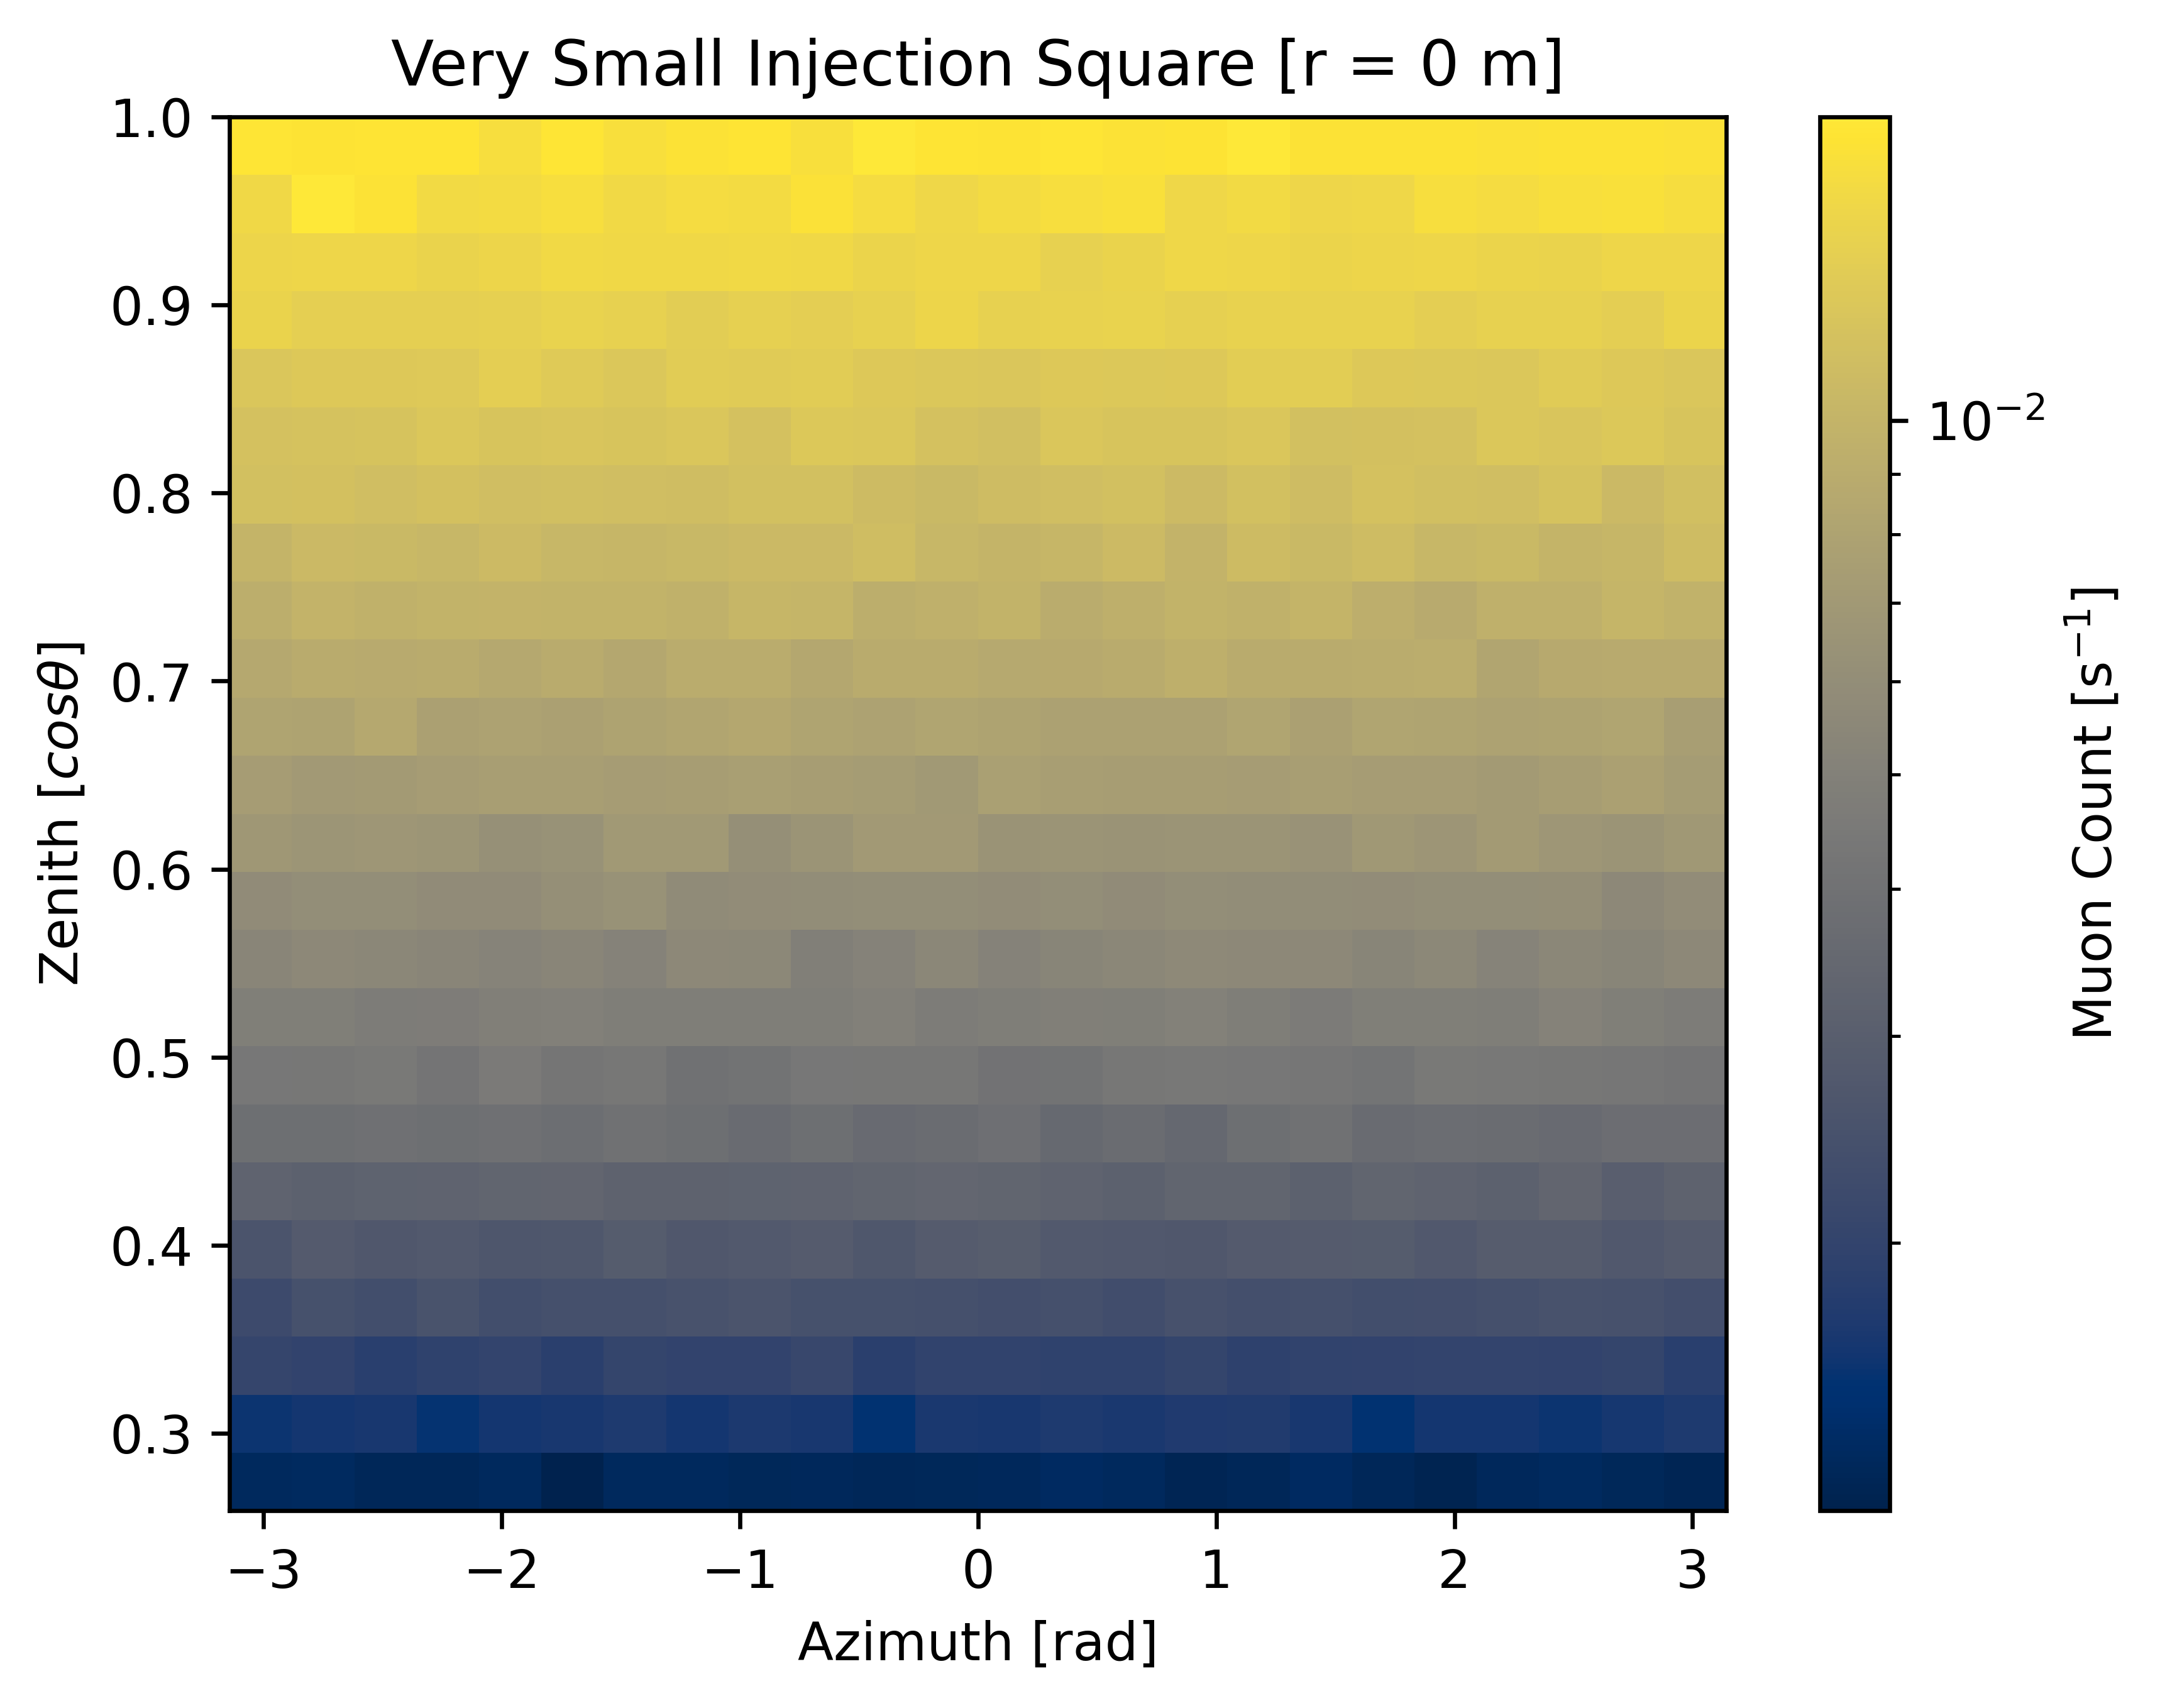

In [34]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mask = (hits & muon_passes )& angular_acceptance_mask
azimuth_bins = np.linspace(-np.pi, np.pi, 25)
zenith_bins = np.linspace(np.cos(np.radians(75)), 1, 25)

H, bins, yedges = np.histogram2d(phi_det[mask], np.cos(theta_det[mask]), bins=(azimuth_bins, zenith_bins), weights=weights[mask],density=False)
H = H.T
# Creating plot
plt.figure(dpi = 600)
plt.pcolormesh(bins, yedges, H, norm=mpl.colors.LogNorm(), cmap= plt.cm.cividis)
cbar = plt.colorbar()
cbar.set_label(r'Muon Count [s$^{-1}$]')
plt.xlabel('Azimuth [rad]')
plt.ylabel(r'Zenith [$cos \theta$]')
plt.title(f'Very Small Injection Square [r = {r} m]')
plt.show()


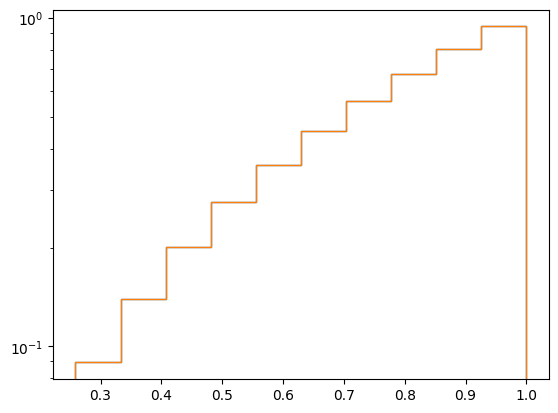

In [32]:
plt.figure()
plt.hist(cos_zenith[mask], weights= weights[mask],histtype='step')
plt.hist(np.cos(theta_new)[mask], weights=weights[mask], histtype='step')
plt.yscale('log')
plt.show()